In [693]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

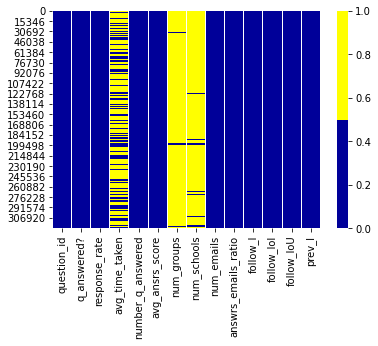

ValueError: could not convert string to float: '97d6255739d547afba83107bbc3a5ac4'

ValueError: could not convert string to float: '97d6255739d547afba83107bbc3a5ac4'

In [700]:
%run Data_prep_and_model.ipynb

### Testing Environment Simulation Overview

In order to test how well our model works on ‘new questions’. We will create an event-driven simulation that simulates CareerVillage. The simulation does the following:

- Generate a question:
    We will randomly generate questions with a given timestamp at which the question would be posted. We perform Bayesian Inference to determine these timestamps using the provided data. 
   
- Send the question to 200 professionals:
    We run the trained neural network on the randomly generated question, paired with every professional, and determine the probability that the question will be answered by a given professional. We then choose the top 200 probabilities and send them the questions.
    
- Answering the questions:
    The professionals answer a given question with the given probability output by the Neural Network. For those that do answer the question, we again perform Bayesian Inference to determine the time that the professional will take to answer a given question and we post the answers accordingly.

- Record metrics:
     We will record several metrics and the results should help us estimate the performance of our model i.e. if more questions get answered in our simulation, then the model is working well. Using the simulation, we can perform data analysis that should inform us of the performance of the technique above (e.g. the response rate, how fast questions are answered...etc). That should give us enough information to improve the model.


In [658]:
import datetime

date_time_str = '2018-06-29 08:15:27.243860'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

In [659]:
q_timestamps_series = pd.to_datetime(questions.questions_date_added)
q_timestamps_series.sort_values(inplace=True)
q_timestamps_series

6784    2011-09-27 15:23:17+00:00
7937    2011-09-27 15:23:54+00:00
21892   2011-09-27 15:24:27+00:00
5278    2011-09-27 15:24:52+00:00
19021   2011-09-27 15:26:19+00:00
                   ...           
4342    2019-01-31 19:25:15+00:00
5096    2019-01-31 19:26:27+00:00
124     2019-01-31 19:30:12+00:00
8534    2019-01-31 21:05:44+00:00
9858    2019-01-31 22:32:00+00:00
Name: questions_date_added, Length: 23931, dtype: datetime64[ns, UTC]

In [660]:
q_ts_series_recent = q_timestamps_series[q_timestamps_series>pd.Timestamp('2015-12-31 23:59:59.999').tz_localize('UTC')] 

In [661]:
month_day_pairs = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

q_timestamps = {2011:{},2012:{},2013:{},2014:{},2015:{},2016:{},2017:{},2018:{},2019:{}}
for year in range(2011,2020):
    max_timestamp = pd.Timestamp('{}-12-31 23:59:59.999'.format(year)).tz_localize('UTC')
    min_timestamp = pd.Timestamp('{}-12-31 23:59:59.999'.format(year-1)).tz_localize('UTC')
    full_year = q_timestamps_series[q_timestamps_series < max_timestamp][q_timestamps_series>min_timestamp]
    for month in range(1,13):
        max_ts = pd.Timestamp('{}-{}-{} 23:59:59.999'.format(year,month,month_day_pairs[month])).tz_localize('UTC')
        min_timestamp = pd.Timestamp('{}-{}-{} 00:00:00.00'.format(year,month,1)).tz_localize('UTC')
        if list(full_year[full_year < max_ts][full_year > min_timestamp]): 
            q_timestamps[year][month] = full_year[full_year < max_ts][full_year > min_timestamp]
        else:
            q_timestamps[year][month] = []

In [671]:
waiting_times = {2011:{},2012:{},2013:{},2014:{},2015:{},2016:{},2017:{},2018:{},2019:{}}
for year in range(2011,2020):
    for month in range(1,13):
        if len(list(q_timestamps[year][month]))>1:
            waiting_times[year][month] = pd.Series(np.ediff1d(q_timestamps[year][month])).dt.total_seconds()/60
        else:
            waiting_times[year][month] = []

No handles with labels found to put in legend.


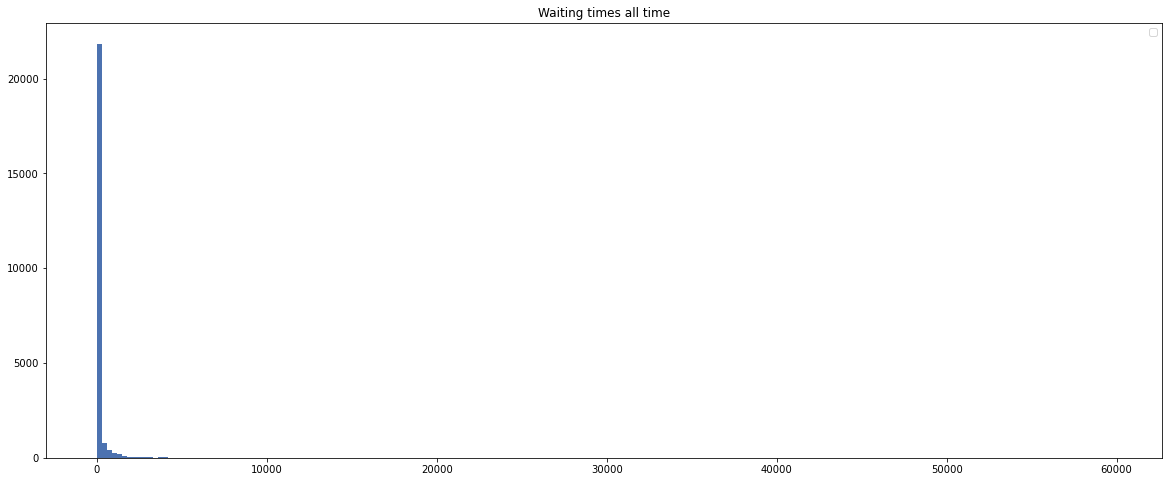

In [672]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# bins = np.linspace(0, 1000, 30)
plt.figure(figsize=(20,8))
plt.hist(all_waiting_times, bins = 200)
plt.legend(loc='upper right')
plt.title('Waiting times all time'.format(mo))
plt.show()

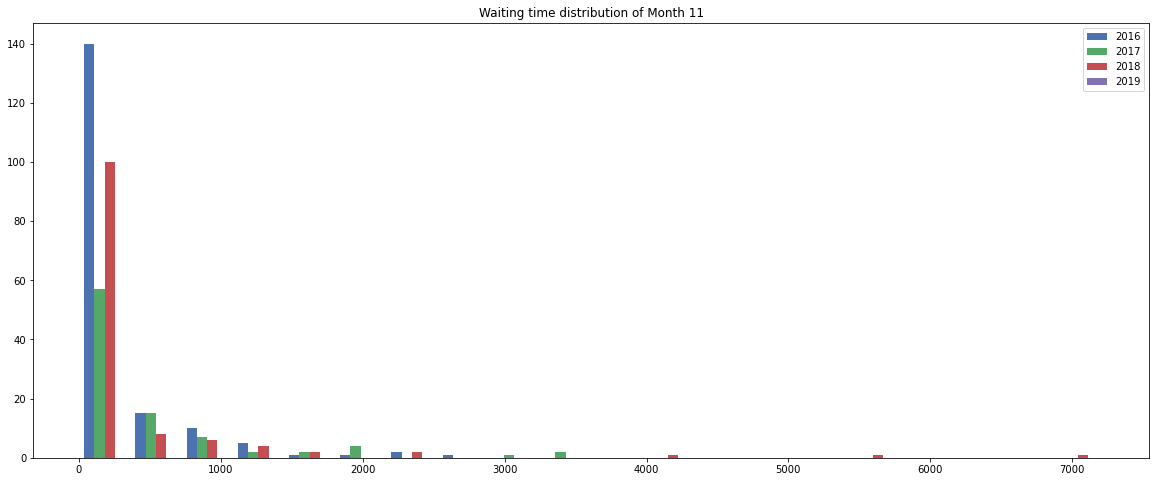

In [673]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

mo = 11
# bins = np.linspace(0, 1000, 30)
plt.figure(figsize=(20,8))
plt.hist([waiting_times[year][mo] for year in range(2016,2020)], bins = 20,label=list(range(2016,2020)))
plt.legend(loc='upper right')
plt.title('Waiting time distribution of Month {}'.format(mo))
plt.show()

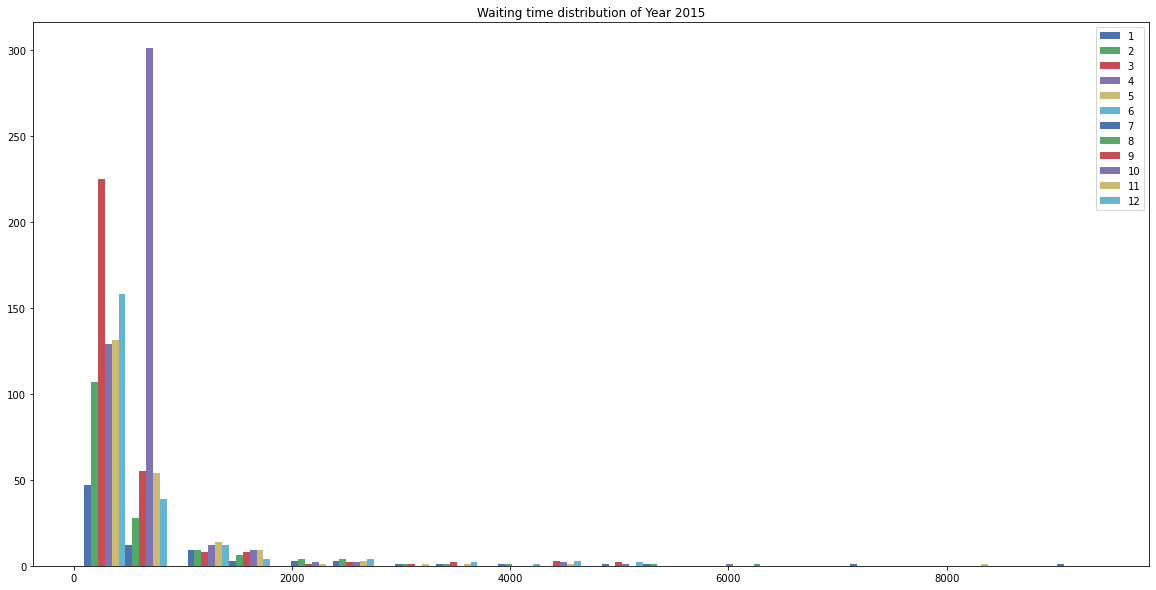

In [674]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

ye = 2015
# bins = np.linspace(0, 1000, 30)
plt.figure(figsize=(20,10))
plt.hist([waiting_times[ye][month] for month in range(1,13)], 10, label=list(range(1,13)))
plt.legend(loc='upper right')
plt.title('Waiting time distribution of Year {}'.format(ye))
plt.show()

In [675]:
questions_per_year = []
for key in q_timestamps_yearly:
    questions_per_year.append(len(q_timestamps_yearly[key]))
print(questions_per_year)

[29, 435, 157, 1007, 1466, 9281, 3255, 7994, 307]


(array([1163., 1129., 1033.,  975.,  862.,  655.,  573.,  340.,  268.,
         265.,  290.,  293.,  354.,  775., 1016., 1125., 1223., 1251.,
        1344., 1446., 1252., 1114., 1016., 1075.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

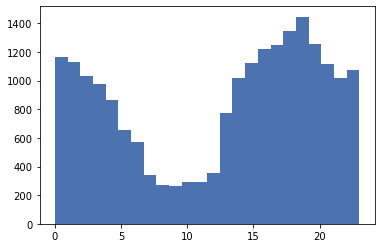

In [676]:
plt.hist(q_ts_series_recent.dt.hour, bins =24)

### Modeling waiting times between question postings

In [677]:
wt_recent = {
    1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]
}

for month in range(1,13):
    wt_month = []
    for year in range(2016,2020):
        wt_month += list(waiting_times[year][month])
    wt_recent[month] = wt_month

4625


(array([188., 491., 210., 420., 555., 808., 623., 590., 594., 146.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

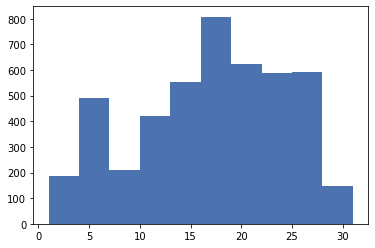

In [678]:
ye1 = 2016
mo1 = 5
ts_range = (
    pd.Timestamp('{}-{}-{} 00:00:00.000'.format(ye1,mo1,1)).tz_localize('UTC'),
    pd.Timestamp('{}-{}-{} 23:59:59.999'.format(ye1,mo1,month_day_pairs[mo1])).tz_localize('UTC')
           )

month_timestamps = q_timestamps_series[q_timestamps_series > ts_range[0]][q_timestamps_series < ts_range[1]]
month_timestamps_days = month_timestamps.dt.day
print(len(month_timestamps_days))
plt.hist(month_timestamps_days)

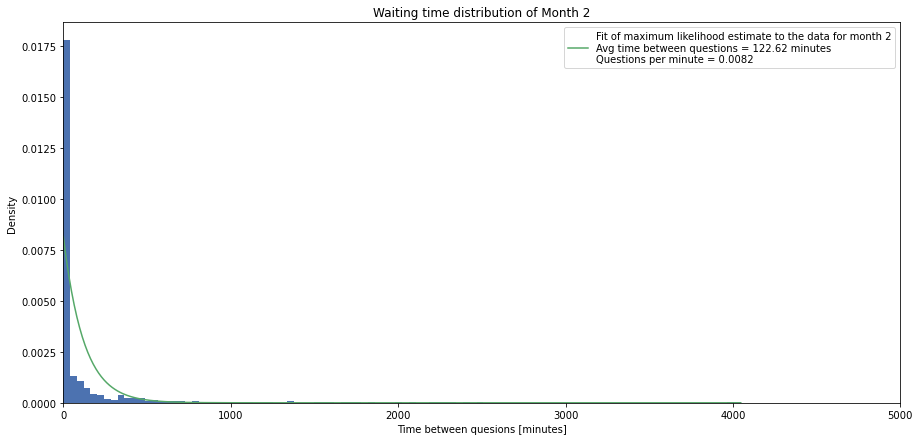

In [679]:
plt.style.use('seaborn-deep')
mo = 2

lambda_ = 1 / np.mean(wt_recent[mo])
distribution = sts.expon(scale=1/lambda_)

# max_bins = 10000
# bins = np.linspace(0, max_bins, 30)
plt.figure(figsize=(15,7))
plt.hist(wt_recent[mo], 100, density=1)
x = np.linspace(0, max(wt_recent[mo]), 500)
y = distribution.pdf(x)
plt.plot(x, y, label = f'Fit of maximum likelihood estimate to the data for month {mo}\nAvg time between questions = {round(1/lambda_,2)} minutes\nQuestions per minute = {round(lambda_,4)}')
plt.xlabel('Time between quesions [minutes]')
plt.ylabel('Density')
plt.title('Waiting time distribution of Month {}'.format(mo))
plt.xlim([0,5000])
plt.legend()
plt.show()

In [680]:
means = []
for mon in range(1,13):
    means.append(1/np.mean(wt_recent[mon]))
    

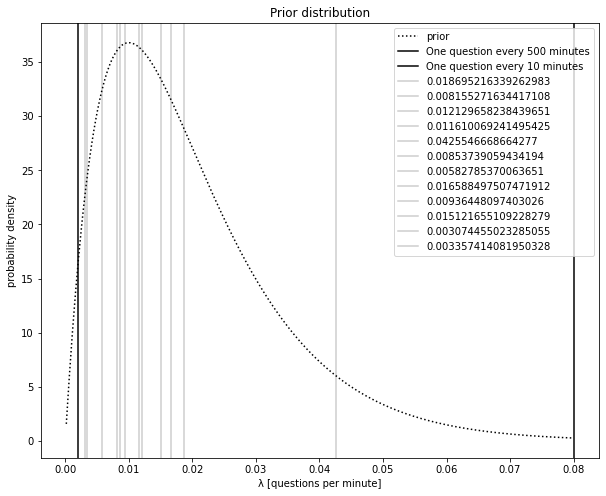

In [681]:
def prior(alpha, beta, lambda_):
    return sts.gamma(alpha, scale=beta).pdf(lambda_)

# PLOT THE PRIOR
alpha = 2
beta = 1/100

lambdas = np.linspace(0, 0.08, 501)[1:]
plt.figure(figsize=(10, 8))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.axvline(x=0.002, color = 'black', label = 'One question every 500 minutes')
plt.axvline(x=0.08, color = 'black', label = 'One question every 10 minutes')
for mean in means:
    plt.axvline(x=mean, color = 'black', label = '{}'.format(mean),alpha=0.2)
plt.xlabel('λ [questions per minute]')
plt.ylabel('probability density')
plt.title(f'Prior distribution')
plt.legend()
plt.show()

In [682]:
# DEFINE THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

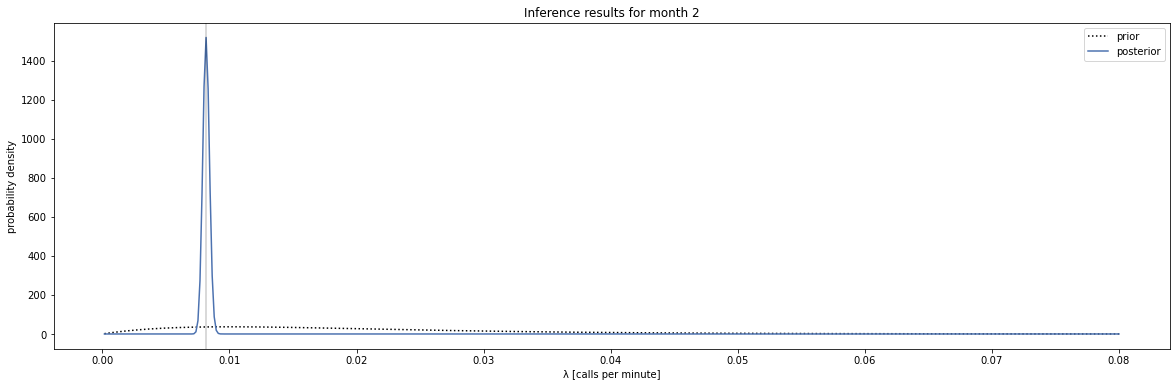

In [683]:
# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.

def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(alpha,beta,parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

posterior = compute_posterior(lambdas, prior, likelihood, wt_recent[mo])

# YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
plt.figure(figsize=(20, 6))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.axvline(x=means[mo-1], alpha=0.2, color = 'black')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for month {mo}')
plt.legend()
plt.show()

In [684]:
def analytical_posterior(x,alpha,beta,data):
    alpha1 = alpha+len(data)
    beta1 = 1/beta+np.sum(data)
    return sts.gamma(alpha1,scale=1/beta1).pdf(x)

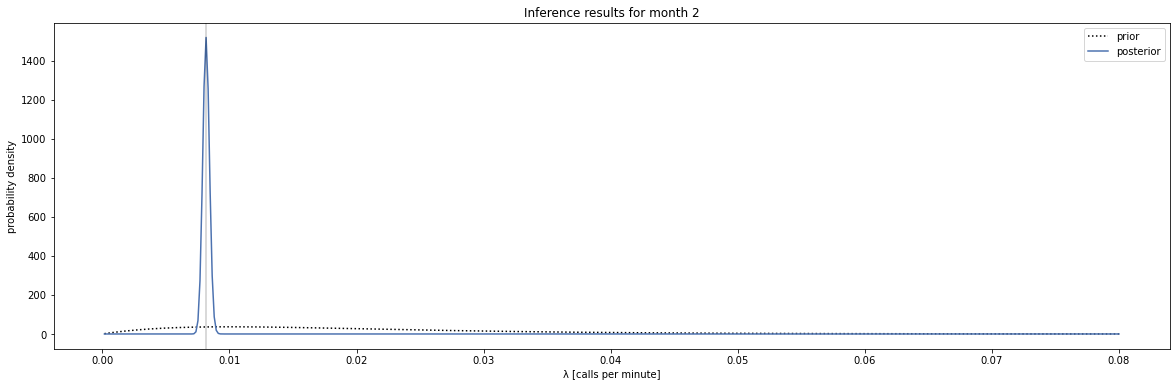

In [685]:
posterior = analytical_posterior(lambdas, alpha,beta, wt_recent[mo])

plt.figure(figsize=(20, 6))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.axvline(x=means[mo-1], alpha=0.2, color = 'black')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for month {mo}')
plt.legend()
plt.show()

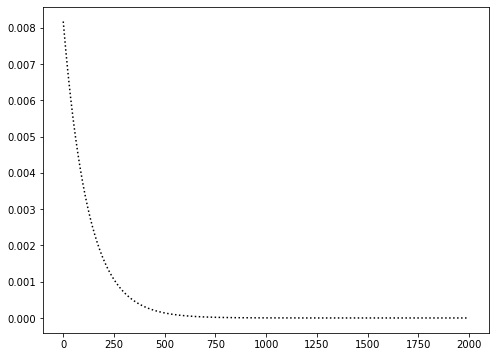

In [686]:
def posterior_predictive(x,alpha,beta,data):
    return sts.lomax.pdf(x, c = alpha+len(data), scale = beta+np.sum(data))

x = np.linspace(0,2000,1000)
plt.figure(figsize=(8, 6))
plt.plot(x, analytical_posterior_predictive(x,2,1/100,wt_recent[mo]), color='black', linestyle=':', label='posterior predictive')


In [687]:
def posterior_predictive_rvs(alpha,beta,data,size=1):
    return sts.lomax(c = alpha+len(data), scale = beta+np.sum(data)).rvs(size=size) if size>1 else sts.lomax(c = alpha+len(data), scale = beta+np.sum(data)).rvs()

In [688]:
alpha_beta_posteriors = {}
for month in range(1,13):
    alpha_beta_posteriors[month] = (len(wt_recent[month]),np.sum(wt_recent[month]))
    
def post_pred_rvs(month,size=1):
    alpha_, beta_ = alpha_beta_posteriors[month]
    if size == 1:
        return sts.lomax(c=alpha_, scale = beta_).rvs()
    else:
        return sts.lomax(c=alpha_, scale = beta_).rvs(size=size)
    
class Simulation:
    def __init__(self, threshold =0.6):
        self.time = datetime.datetime.now()
        self.questions = []
        self.threshold
    
    def next_question(self):
        current_month = self.time.month
        new_question = ### generate random question with random parameters
        to_send = {}
        for prof_id in professionals.professionals_id:
            q_features = # new_question + professionals_dataset[features]
            prob = model(q_features)
            if prob > threshold
            to_send[prof_id] = 
        
        
        
        
        

In [692]:
questions

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...
...,...,...,...,...,...
23926,ce1ff7a035d74721a5b7d21105f9ddb6,c1c6e6a8c9df4c02af52eda6fa0c552f,2016-04-07 01:08:59 UTC+0000,What is a computer engineer & a computer progr...,<p>I want to know which one is better to do an...
23927,7df38c9ded4a4474bb4f9c1f659e1ad1,6ab792d625e14eb2abc14f9a57a450aa,2015-01-26 17:44:44 UTC+0000,What major do I need to study to be a writer,I am a high school junior and for awhile now I...
23928,63c89317413046f483020585f0cc8dc4,977428d851b24183b223be0eb8619a8c,2011-11-09 20:42:47 UTC+0000,Which careers are good if I enjoy working with...,"I have been volunteering, and I have found tha..."
23929,b64ef9cf0d33475ca9c22bdb8749f5a8,82cc74c0e18347e4b68b219e250eb10f,2016-05-28 03:08:07 UTC+0000,How can going to college help me advance my ca...,I am thinking about a career in law enforcemen...


In [699]:
model_dataset1.groupby('question_id')

KeyError: 'question_id'

In [641]:
a = datetime.datetime.now()

In [642]:
a

datetime.datetime(2020, 12, 5, 18, 44, 50, 440959)

In [644]:
a+datetime.timedelta(0,3600)

datetime.datetime(2020, 12, 5, 19, 44, 50, 440959)